<a href="https://colab.research.google.com/github/MiracleCakra/2341720032_ML_2025/blob/main/TP_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 1
## Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%

## Import Library & Load Data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


## Definisi Model (Modified CNN)

In [2]:
model_cifar = models.Sequential()

model_cifar.add(layers.RandomFlip("horizontal", input_shape=(32, 32, 3)))
model_cifar.add(layers.RandomRotation(0.1))
model_cifar.add(layers.RandomZoom(0.1))

# -- Block 1: Conv -> BatchNorm -> Conv -> BatchNorm -> Pool -> Dropout --
model_cifar.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.MaxPooling2D((2, 2)))
model_cifar.add(layers.Dropout(0.2))

# -- Block 2: Conv -> BatchNorm -> Conv -> BatchNorm -> Pool -> Dropout --
model_cifar.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.MaxPooling2D((2, 2)))
model_cifar.add(layers.Dropout(0.3))

# -- Block 3: Conv -> BatchNorm -> Conv -> BatchNorm -> Pool -> Dropout --
model_cifar.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.MaxPooling2D((2, 2)))
model_cifar.add(layers.Dropout(0.4))

# -- Flatten & Dense Layers --
model_cifar.add(layers.Flatten())
model_cifar.add(layers.Dense(128, activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Dropout(0.5))
model_cifar.add(layers.Dense(10))

# Cek Arsitektur
model_cifar.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

## Compile Model

In [3]:
model_cifar.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training Model

In [4]:
history_cifar = model_cifar.fit(train_images, train_labels, epochs=30,
                                validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 468s 295ms/step - accuracy: 0.3136 - loss: 2.1129 - val_accuracy: 0.4443 - val_loss: 1.6324
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 454s 291ms/step - accuracy: 0.5113 - loss: 1.3748 - val_accuracy: 0.5629 - val_loss: 1.2350
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 449s 287ms/step - accuracy: 0.5731 - loss: 1.2088 - val_accuracy: 0.6570 - val_loss: 0.9815
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 501s 286ms/step - accuracy: 0.6222 - loss: 1.0857 - val_accuracy: 0.6763 - val_loss: 0.9413
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 445s 285ms/step - accuracy: 0.6478 - loss: 1.0184 - val_accuracy: 0.6920 - val_loss: 0.9048
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 504s 286ms/step - accuracy: 0.6671 - loss: 0.9610 - val_accuracy: 0.7191 - val_loss: 0.8114
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 447s 286ms/step - accuracy: 0.6840 - loss: 0.9163 - val_accuracy: 0.7030 - val_loss: 0.8387
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 504s 288ms/step - ac

## Evaluasi & Plot Hasil

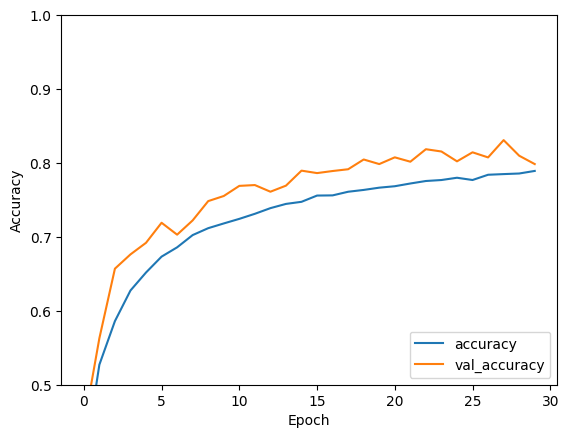

313/313 - 20s - 63ms/step - accuracy: 0.7985 - loss: 0.6062

Final Test Accuracy CIFAR-10: 79.85%


In [5]:
# Plot Akurasi
plt.plot(history_cifar.history['accuracy'], label='accuracy')
plt.plot(history_cifar.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Cetak Akurasi Akhir
test_loss, test_acc = model_cifar.evaluate(test_images, test_labels, verbose=2)
print(f"\nFinal Test Accuracy CIFAR-10: {test_acc*100:.2f}%")

# TUGAS 2
## Buatlah model CNN untuk klasifikasi dataset MNIST.

In [6]:
# Load dataset MNIST
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# Normalize pixel values (0-1)
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

# Reshape data
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Definisi Model CNN untuk MNIST

In [7]:
model_mnist = models.Sequential()

# Layer Konvolusi 1
model_mnist.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 2
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 3
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten & Dense
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(64, activation='relu'))
model_mnist.add(layers.Dense(10))

model_mnist.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile & Training MNIST

In [8]:
model_mnist.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mnist = model_mnist.fit(train_images_mnist, train_labels_mnist, epochs=5,
                                validation_data=(test_images_mnist, test_labels_mnist))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8900 - loss: 0.3520 - val_accuracy: 0.9849 - val_loss: 0.0471
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9856 - val_loss: 0.0429
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9884 - val_loss: 0.0340
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9906 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9947 - loss: 0.0163 - val_accuracy: 0.9914 - val_loss: 0.0294


## Evaluasi Model MNIST

In [9]:
test_loss, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f"\nFinal Test Accuracy MNIST: {test_acc_mnist*100:.2f}%")

313/313 - 2s - 8ms/step - accuracy: 0.9914 - loss: 0.0294

Final Test Accuracy MNIST: 99.14%
